<a href="https://colab.research.google.com/github/marioruizgonzalez/ml-easy-exersices/blob/main/PMC_of_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
                                ])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
history = model.fit(X_train, y_train, epochs= 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7450 - val_loss: 1.2065
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4427 - val_loss: 2.8773
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4193 - val_loss: 1.8378
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4018 - val_loss: 1.4158
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3906 - val_loss: 1.8942
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4022 - val_loss: 0.5931
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3819 - val_loss: 1.7646
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3737 - val_loss: 0.4689
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3679 - val_loss: 0.4264
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3719 - val_loss: 0.3845

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.5660


In [ ]:
X_new = X_test[:3]

In [ ]:
y_pred = model.predict(X_new)

In [ ]:
y_pred

array([[0.7878543],
       [2.4181113],
       [1.3359059]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


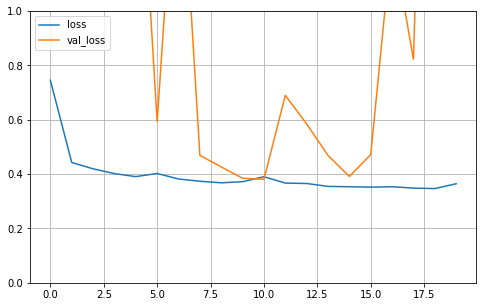

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])

In [ ]:
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

In [ ]:
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

In [ ]:
concat = keras.layers.Concatenate()([input_, hidden2])


In [ ]:
output = keras.layers.Dense(1)(concat)

In [ ]:
model = keras.Model(inputs=[input_], outputs=[output])